In [102]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [117]:
root_dir = '../../data/komonjo_experiment/200003076/'
image_dir = root_dir + 'experiment_result/experiment_016/result_image/'

In [118]:
img = cv2.imread(image_dir + 'input_output_GT_495_0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = img[:, :img.shape[1]//3,:]
label = img[:,img.shape[1]*2//3:,:]
pred = img[:,img.shape[1]//3:img.shape[1]*2//3,:]

In [119]:
def preprocess(image):
    image = cv2.GaussianBlur(image, (5, 5), 0)
    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return image[:,:,0], image[:,:,1], image[:,:,2]

In [120]:
def revise_bounding_box_by_coefficient(X, Y, Width, Height, λ_Width, λ_Height):
    shrink_rate_Width = 1.0-λ_Width
    shrink_rate_Height = 1.0 - λ_Height
    shrink_Width = shrink_rate_Width * Width
    shrink_Height = shrink_rate_Height * Height
        
    X = round(X + 0.5*shrink_Width)
    Y = round(Y + 0.5*shrink_Height)
    Width = round(Width - shrink_Width)
    Height = round(Height - shrink_Height)
    return X, Y, Width, Height

In [121]:
def get_bounding_rectangle(raw_image_RGB, min_area, λ_Width=1.0, λ_Height=1.0):
    raw_image_RGB_with_rectangle = np.copy(raw_image_RGB)
    image_channels = preprocess(raw_image_RGB)
    for channel in image_channels:
        channel_contours, _ = cv2.findContours(channel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        large_contours = [cnt for cnt in channel_contours if cv2.contourArea(cnt) > min_area]
        
        for contour in large_contours:
            X, Y, Width, Height = cv2.boundingRect(contour)
            X, Y, Width, Height = revise_bounding_box_by_coefficient(X, Y, Width, Height, 1/λ_Width, 1/λ_Height)
            cv2.rectangle(raw_image_RGB_with_rectangle, (X, Y), (X+Width, Y+Height), (255, 0, 0), 2)
    return raw_image_RGB_with_rectangle

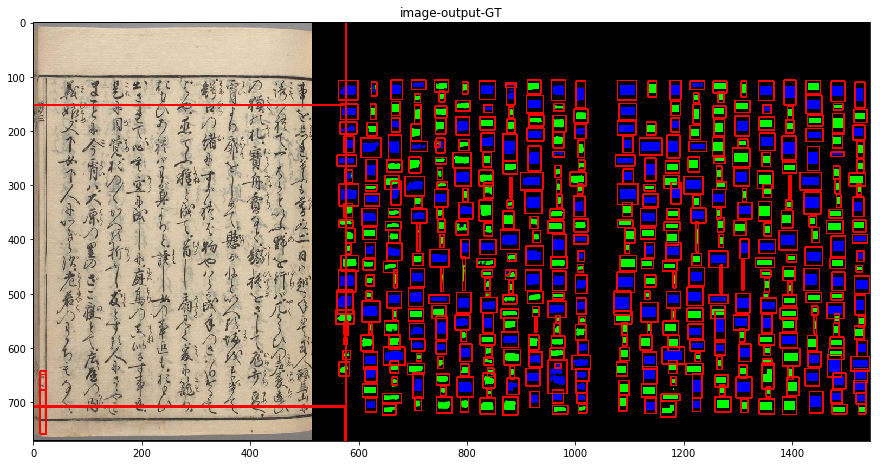

In [124]:
plt.figure(figsize = (15,15))
plt.title('image-output-GT')
plt.imshow(get_bounding_rectangle(img, min_area=10, λ_Width=0.8, λ_Height=0.5))
# erosion and dilation
# ROI pooling

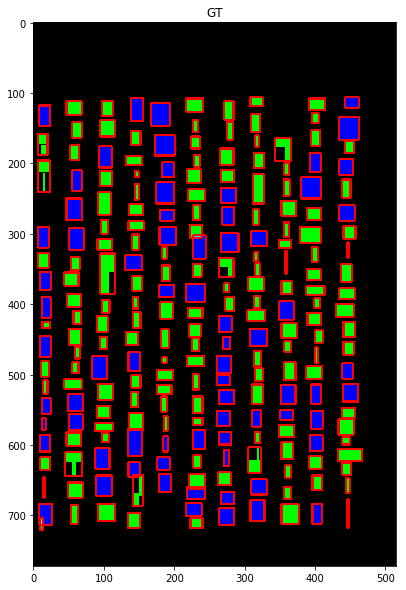

In [69]:
plt.figure(figsize = (10,10))
plt.title('GT')
plt.imshow(get_bounding_rectangle(label, 10))

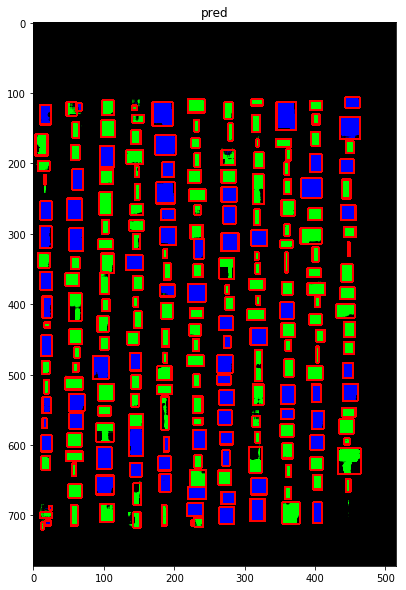

In [70]:
plt.figure(figsize=(10,10))
plt.title('pred')
plt.imshow(get_bounding_rectangle(pred, 10))

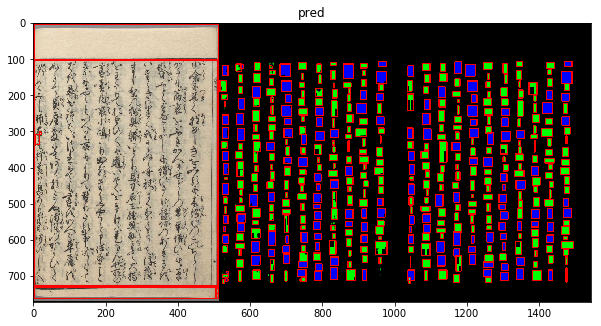

In [71]:
plt.figure(figsize=(10,10))
plt.title('pred')
plt.imshow(get_bounding_rectangle(img, 10))